<h1><center>Lab Assignment 4</center></h1>

<center> DUE: <font color = 'blue'> Tuesday, October 31st by 3:00 PM (EST)</font> via Canvas </center>

Please submit:

1) a PDF with all code in-line, generated from Jupytor Notebook
      - If there is an error when you generate pdf, please refer this.
  [4 ways to export Jupyter Notebook as PDF](https://mljar.com/blog/jupyter-notebook-pdf/#:~:text=The%20Jupyter%20Notebook%20has%20an,not%20visible%20in%20the%20screenshot)
      - <font color = red>If you submit your result as ipynb extension, you will deduct points.</font>

<h3><center>[Asad Hashmi]</center></h3>

### Problem Description

Gross Domestic Product (GDP) measures the size of an economy.  In this assignment, you will model the GDP growth of China during the years 1978-2014.  Using the dataset `lab4_data.csv`, answer the following questions using Python. 
 
**Round your answers to two decimal places, and include all code and figures.**

In [2]:
import numpy as np                    #to use matrix operations
import pandas as pd                   #to handle data
import matplotlib.pyplot as plt       #to draw plot
import statsmodels.api as sm          #to use statistical model
import statsmodels.formula.api as smf #to use statistical model

#### (a) (2 points)

**Using Python, construct and show a scatter plot of GDP in billions of USD ($y$) vs. the year ($x$).** 

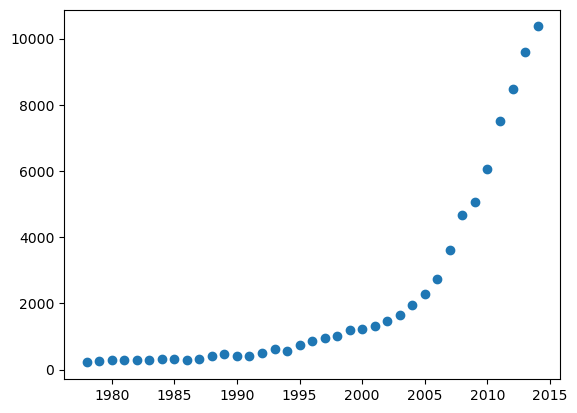

In [3]:
df = pd.read_csv("lab4_data.csv")
df = df.rename(columns={'Year': 'x', 'GDP (in billions of USD)': 'y'})
plt.plot(df['x'], df['y'], 'o')
plt.show()

#### (b-1) (3 points)

**Using the dataset, fit a simple linear regression model with year as the predictor and GDP as the response. Report the model parameter estimates, regression equation, and coefficient of determination.**

In [4]:
lm_model = smf.ols(
        formula = 'y ~ x',data=df).fit() 
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     66.09
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.42e-09
Time:                        17:03:06   Log-Likelihood:                -326.40
No. Observations:                  37   AIC:                             656.8
Df Residuals:                      35   BIC:                             660.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.193e+05   5.18e+04     -8.088      0.000   -5.25e+05   -3.14e+05
x            211.1407     25.972      8.130      0.000     158.416     263.866
==============================================================================
Omnibus:                        5.599   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.742
Skew:                           0.874   Prob(JB):                       0.0934
Kurtosis:                       3.147   Cond. No.                     3.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

parameter estimates: Intercept = -4.193e+05, Slope = 211.1407x
regression equation: y = -4.193e+05 + 211.1407x
coefficient of determination: 0.654

#### (b-2) (1 points)

**Draw the linear regression line on the scatter plot for (a)**

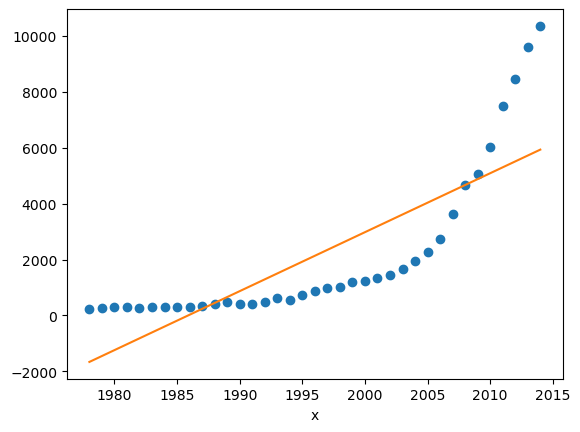

In [5]:
plt.plot(df['x'], df['y'], 'o')
plt.plot(df['x'], lm_model.fittedvalues)
plt.xlabel('x')
plt.show()

#### (b-3) (3 points)

**Draw residual plot (standardized residual vs fitted values) and assess the model adequacy**

In [7]:
## Find standardized residuals
# Create instance of influence
# Influence object includes useful informations such as standardized residuals, leverage values 
influence = lm_model.get_influence()
         #obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

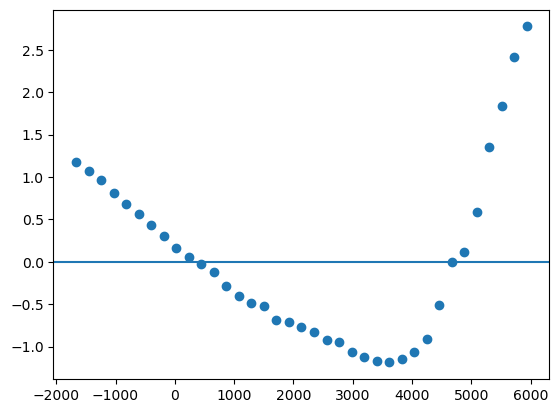

In [8]:
plt.plot(lm_model.fittedvalues, standardized_residuals,'o')
plt.axhline(y=0,linestyle = '-')

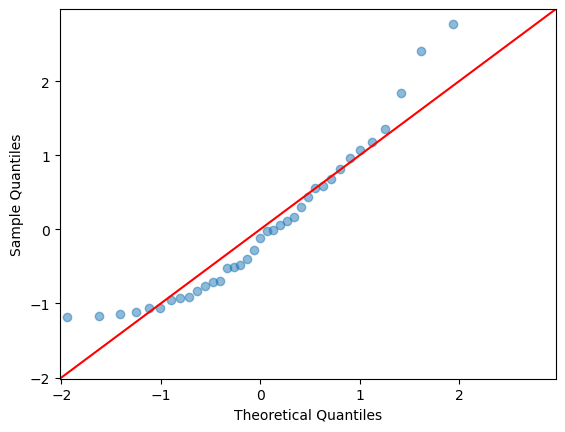

In [16]:
sm.qqplot(standardized_residuals,line='45', alpha=0.5, lw=1) 
plt.show()

#### (c) (3 points)

**Assuming a *linear-log* relationship between $y$ and $x$ (i.e., $y=\alpha+\beta\log{x}$), estimate the parameters $\alpha$ and $\beta$ by using an appropriate transformation.  Report the coefficient of determination of the fitted linear model.**

In [10]:
df['log_x'] = np.log(df['x'])


In [11]:
log_model = smf.ols(
formula = 'y ~ log_x',data=df).fit()
log_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     65.50
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.57e-09
Time:                        17:05:29   Log-Likelihood:                -326.51
No. Observations:                  37   AIC:                             657.0
Df Residuals:                      35   BIC:                             660.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.195e+06   3.95e+05     -8.088      0.000      -4e+06   -2.39e+06
log_x       4.208e+05    5.2e+04      8.093      0.000    3.15e+05    5.26e+05
==============================================================================
Omnibus:                        5.658   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.793
Skew:                           0.878   Prob(JB):                       0.0910
Kurtosis:                       3.155   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

parameter estimates: intercept = -3.195e+06, Slope = 4.208e+05*log(x) 
regression equation: y = -3.195e+06 + 4.208e+05*log(x) 
coefficient of determination: 0.652

#### (d) (3 points)

**Assuming a *power* relationship between $y$ and $x$ (i.e., $y=\alpha x^\beta$), estimate the parameters $\alpha$ and $\beta$ by using appropriate transformations to linearize the equation.  Report the coefficient of determination of the fitted linear model.**

In [12]:
log_y = np.log(df['y'])
power_model = smf.ols(
formula = 'log_y ~ log_x',data=df).fit()
power_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     610.0
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           9.83e-24
Time:                        17:06:23   Log-Likelihood:                -4.7184
No. Observations:                  37   AIC:                             13.44
Df Residuals:                      35   BIC:                             16.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1623.1505     66.003    -24.592      0.000   -1757.143   -1489.158
log_x        214.5161      8.686     24.697      0.000     196.883     232.149
==============================================================================
Omnibus:                       11.203   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.559
Skew:                           0.412   Prob(JB):                        0.169
Kurtosis:                       1.724   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

coefficent of determination:  0.946
𝛼: -1623.1505	
𝛽: 214.5161
  

#### (e) (3 points)

**Assuming an *exponential* relationship between $y$ and $x$ (i.e., $y=\alpha e^{\beta x}$), estimate the parameters $\alpha$ and $\beta$ by using appropriate transformations to linearize the equation.  Report the coefficient of determination of the fitted linear model.**

In [13]:
exp_model = smf.ols(
formula = 'log_y ~ x',data=df).fit()
exp_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     622.3
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           7.06e-24
Time:                        17:07:01   Log-Likelihood:                -4.3686
No. Observations:                  37   AIC:                             12.74
Df Residuals:                      35   BIC:                             15.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -207.7031      8.604    -24.139      0.000    -225.171    -190.235
x              0.1075      0.004     24.945      0.000       0.099       0.116
==============================================================================
Omnibus:                       11.126   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.540
Skew:                           0.410   Prob(JB):                        0.170
Kurtosis:                       1.725   Cond. No.                     3.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

coefficent of determination:  0.947
𝛼': −207.7
𝛽: 0.1075

#### (f) (3 points)

**Using the exponential relationship with the estimated parameters from (e), predict the GDP of China in 2015.  Also, report the 95% prediction interval.**

In [14]:
# original data
Xnew = np.array([2015])
Xnew = pd.DataFrame(Xnew,columns = ['x'])
round(exp_model.get_prediction(Xnew).summary_frame(alpha=0.05),3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8.976,0.094,8.785,9.166,8.376,9.575


The estimated GDP is exp{8.976} = 7942.63 Billions of Dollars
The PI is (exp{8.376}, exp(9.575)} = (4359.00, 14447.42) Billions of Dollars